<a href="https://colab.research.google.com/github/Neha1025/Stock-Price-Prediction/blob/main/MA_and_EMA_on_Tesla_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime as datetime

In [4]:
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 25.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
df_tsla=pdr.get_data_yahoo('TSLA')

In [3]:
df_tsla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
...,...,...,...,...,...,...
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978


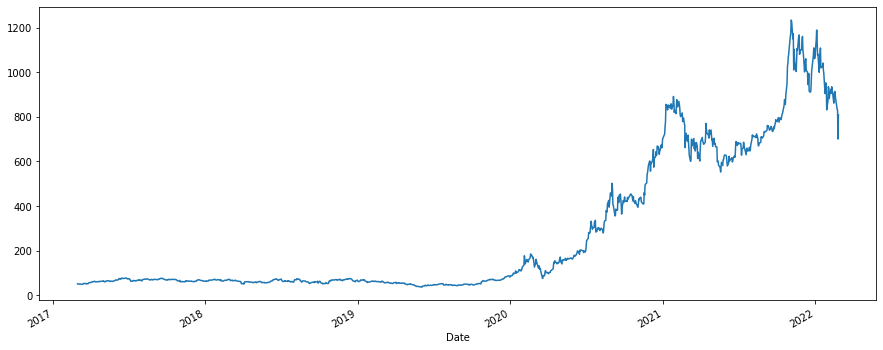

In [4]:
#Simple moving average
df_tsla['Open'].plot(figsize=(15,6))

In [6]:
df_tsla['Open:10 days rolling']=df_tsla['Open'].rolling(window=10,min_periods=1).mean()

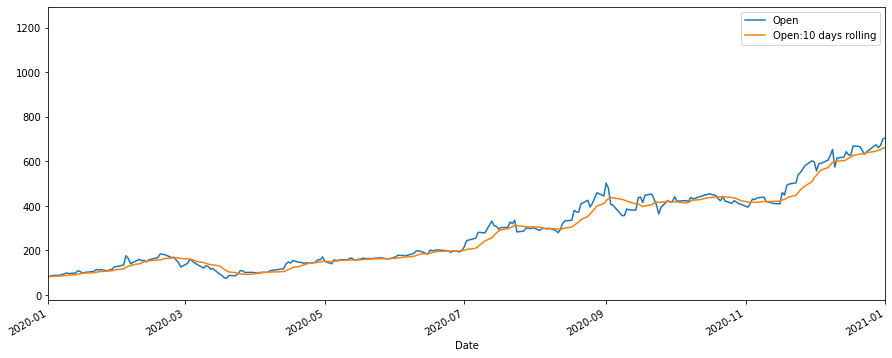

In [10]:
df_tsla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6)) 

In [11]:
df_tsla['Open:30 days rolling']=df_tsla['Open'].rolling(window=30,min_periods=1).mean()
df_tsla['Open:50 days rolling']=df_tsla['Open'].rolling(window=50,min_periods=1).mean()

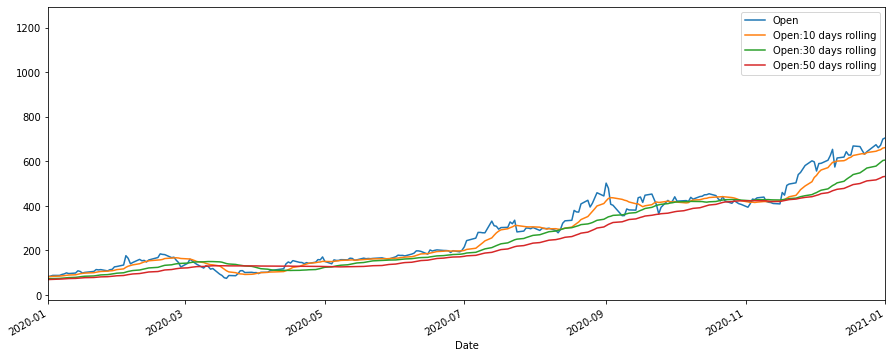

In [12]:
df_tsla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6)) 

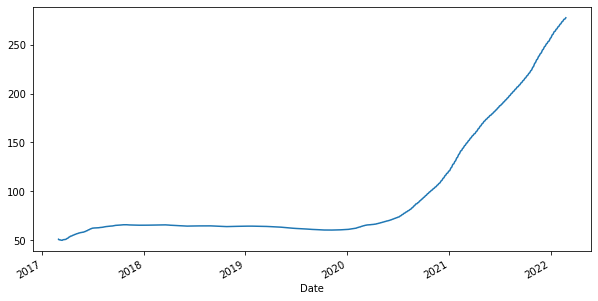

In [13]:
#Expanding ,CMA
df_tsla['Open'].expanding().mean().plot(figsize=(10,5))

In [14]:
#EMA-Exponential moving average
df_tsla['EMA_0.1']=df_tsla['Open'].ewm(alpha=0.1,adjust=False).mean( )



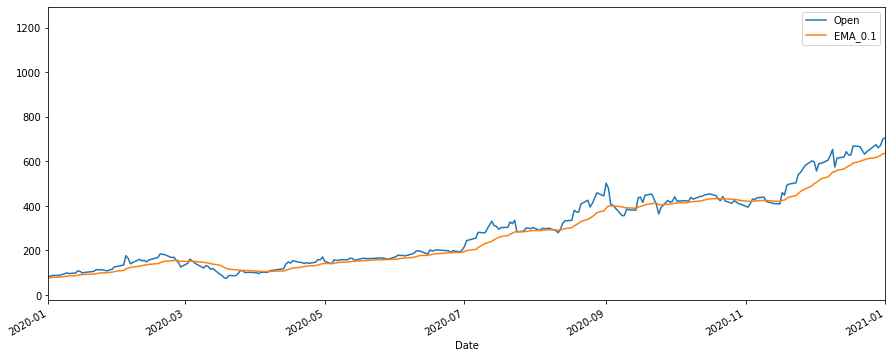

In [15]:
df_tsla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))  

In [16]:
df_tsla['EMA_0.3']=df_tsla['Open'].ewm(alpha=0.3,adjust=False).mean( )


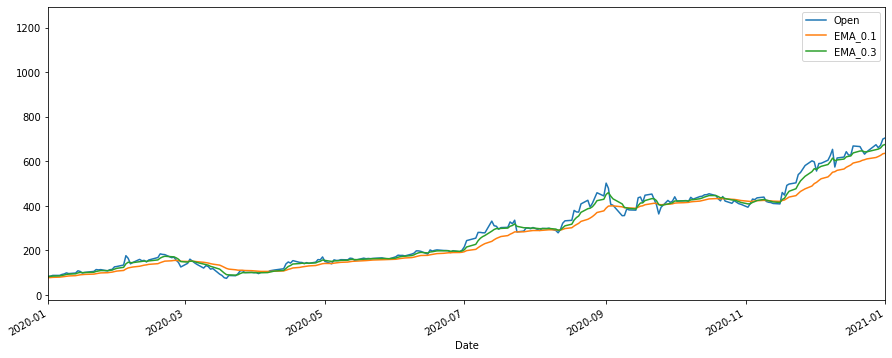

In [17]:
df_tsla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))  

In [18]:
df_tsla['EMA_5days']=df_tsla['Open'].ewm(span=5).mean()

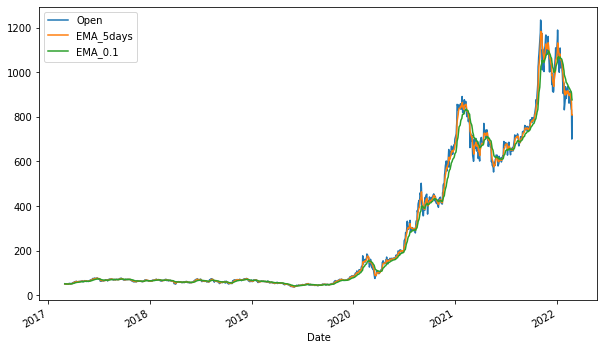

In [20]:
df_tsla[['Open','EMA_5days','EMA_0.1']].plot(figsize=(10,6))